In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math # it can create a backend for jupyter notebook
train=pd.read_csv('titanic_data.csv')

In [65]:
train.shape
test=train.head(400)

In [66]:
train.head(5)
test.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
#replacing the index with passenger id in both the test and train data setsPRINT(TRAIN.HEAD(5))
print(train.head(6))
train.set_index(['PassengerId'],inplace=True)
test.set_index(['PassengerId'],inplace=True)

print(test)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN       

In [15]:
print("passengers count:"+str(len('titanic_data.csv')))

passengers count:16


In [68]:
print(train.head(5))
print(test.head(5))

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

# Analyzing the data

In [69]:
#removing nan values in the data

train.isnull().sum()
test.isnull() .sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age          78
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       309
Embarked      1
dtype: int64

# cleaning the data missing values visualizing the missing values


In [73]:
sns.countplot(x="Survived",data=titanic_data')

NameError: name 'titanic_data' is not defined

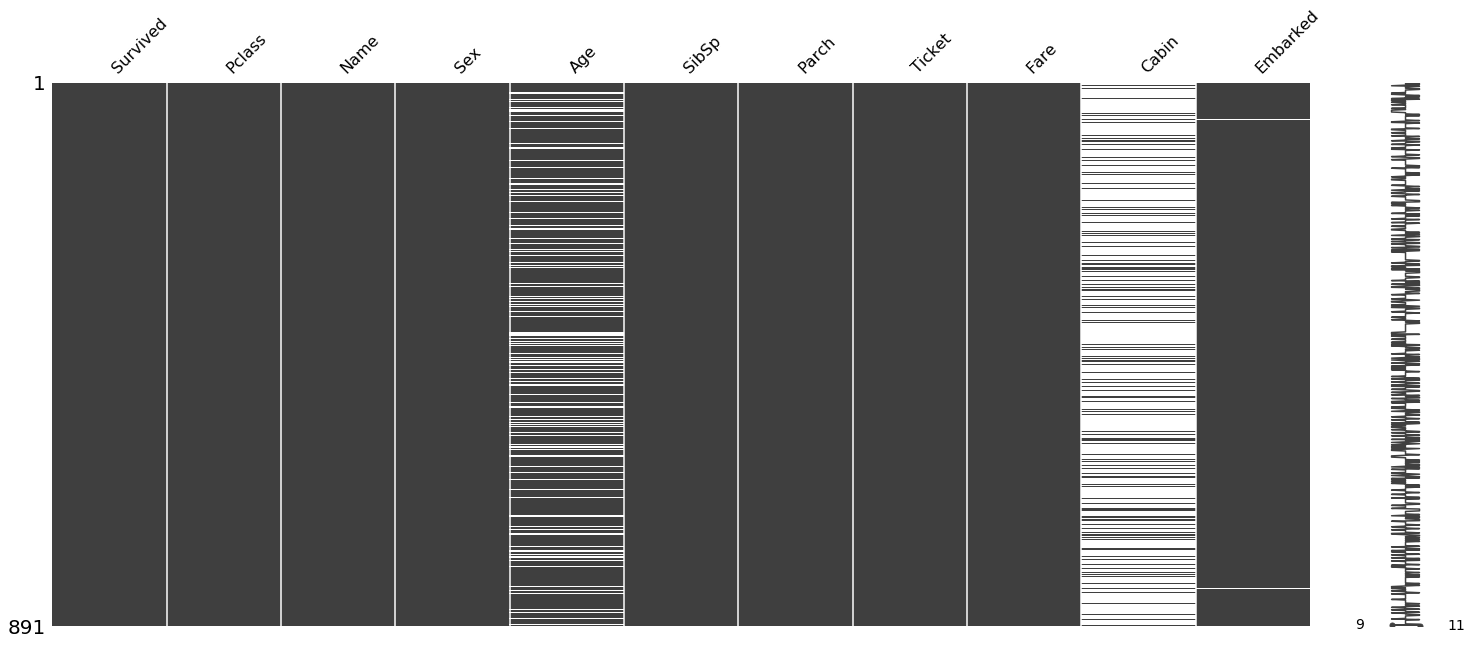

In [19]:
import missingno as mn  # missing values are visualized here
mn.matrix(train)

# let's fill the missing values

In [20]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values="NaN" , strategy = "median", axis=1)

age2 = imp.fit_transform(train['Age'].values.reshape(1,-1))
age2=age2.T
train['Age2']=age2

train.head()
# same do for text data set
age_test=imp.fit_transform(test['Age'].values.reshape(1,-1))
age_test=age_test.T
test['age_test']=age_test
test.head()

# check nan values
train.isnull().sum()

C:\Users\vineethgvk\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\vineethgvk\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Age2          0
dtype: int64

In [21]:
# filling the missing values

train.Embarked.value_counts()
train.Embarked.fillna('S',inplace=True)
train.head(5)
train.isnull().sum()

test.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age          78
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       309
Embarked      0
age_test      0
dtype: int64

In [22]:
train.isnull().sum()
test.isnull().sum()
# if a data has 85 percent above nan values drop those columns from the dataset
train.drop(['Age','Cabin'],axis=1,inplace=True)
test.drop(['Age','Cabin'],axis=1,inplace=True)

C:\Users\vineethgvk\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
train.isnull().sum()
test.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
age_test    0
dtype: int64

# change sex string into integers

In [24]:
train['Sex']=train.Sex.apply(lambda x:0 if x=="female" else 1)

In [25]:
train.Sex

PassengerId
1      1
2      0
3      0
4      0
5      1
      ..
887    1
888    0
889    0
890    1
891    1
Name: Sex, Length: 891, dtype: int64

# Detecting the outliners and removing from the data

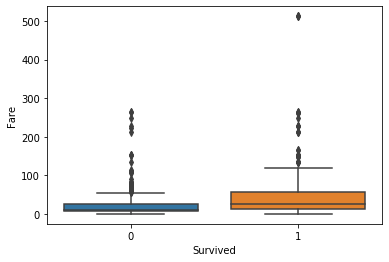

In [26]:
sns.boxplot(x='Survived' , y='Fare',data=train)

In [27]:
train['Fare']=train[train['Fare']<=400]

# Exploratory data analysis

In [28]:
train.describe()

,Survived,Pclass,Sex,SibSp,Parch,Age2
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,0.523008,0.381594,29.361582
std,0.486592,0.836071,0.477990,1.102743,0.806057,13.019697
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.420000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,22.000000
50%,0.000000,3.000000,1.000000,0.000000,0.000000,28.000000
75%,1.000000,3.000000,1.000000,1.000000,0.000000,35.000000
max,1.000000,3.000000,1.000000,8.000000,6.000000,80.000000


In [29]:
train.groupby('Survived').mean()

,Pclass,Sex,SibSp,Parch,Age2
Survived,,,,,
0,2.531876,0.852459,0.553734,0.329690,30.028233
1,1.950292,0.318713,0.473684,0.464912,28.291433


In [30]:
train.groupby('Sex').mean()

,Survived,Pclass,SibSp,Parch,Age2
Sex,,,,,
0,0.742038,2.159236,0.694268,0.649682,27.929936
1,0.188908,2.389948,0.429809,0.235702,30.140676


# correlation and heat map

In [31]:
train.corr()

,Survived,Pclass,Sex,SibSp,Parch,Age2
Survived,1.000000,-0.338481,-0.543351,-0.035322,0.081629,-0.064910
Pclass,-0.338481,1.000000,0.131900,0.083081,0.018443,-0.339898
Sex,-0.543351,0.131900,1.000000,-0.114631,-0.245489,0.081163
SibSp,-0.035322,0.083081,-0.114631,1.000000,0.414838,-0.233296
Parch,0.081629,0.018443,-0.245489,0.414838,1.000000,-0.172482
Age2,-0.064910,-0.339898,0.081163,-0.233296,-0.172482,1.000000


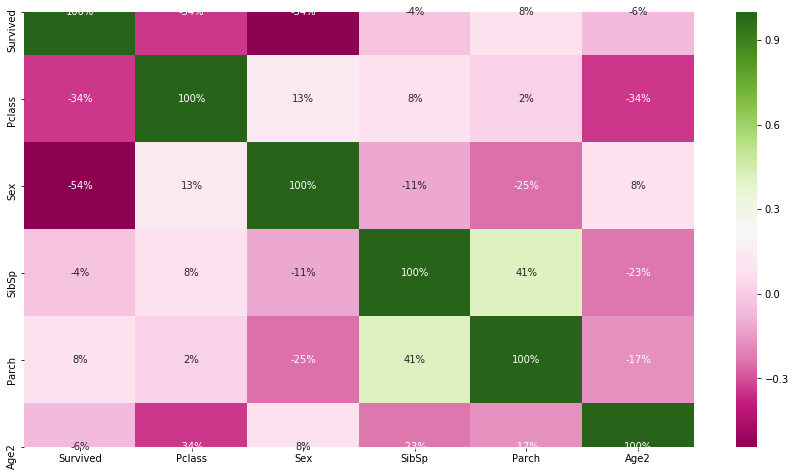

In [19]:
plt.subplots(figsize=(15,8))
sns.heatmap(train.corr(),annot=True, fmt='.0%',cmap= 'PiYG')

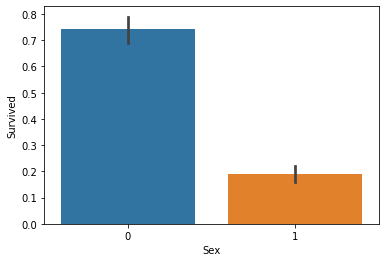

In [32]:
sns.barplot(x='Sex',y='Survived' , data=train)

In [61]:
sns.countplot(x='Survived',hue='Sex',data=titanic_data)

NameError: name 'titanic_data' is not defined

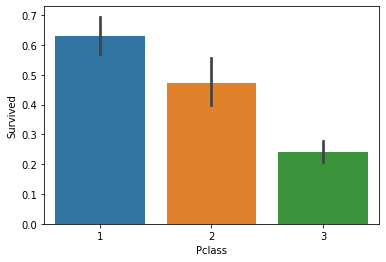

In [33]:
sns.barplot(x='Pclass',y='Survived',data=train)

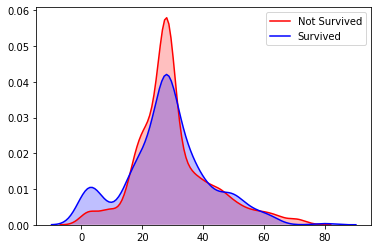

In [34]:
sns.kdeplot(train.loc[(train['Survived']==0),'Age2'],color='r',shade=True,Label='Not Survived')
sns.kdeplot(train.loc[(train['Survived']==1),'Age2'],color='b',shade=True,Label='Survived')

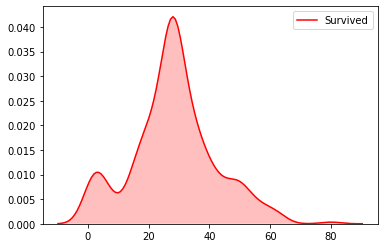

In [35]:
sns.kdeplot(train.loc[(train['Survived']==1),'Age2'],color='r',shade=True,Label='Survived')

# Creating Family Sizes

In [36]:
train['family_size'] = train['SibSp'] + train ['Parch'] + 1
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age2,family_size
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,0,S,22.0,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,1,C,38.0,2
3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,1,S,26.0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,1,S,35.0,2
5,0,3,"Allen, Mr. William Henry",1,0,0,373450,0,S,35.0,1


In [37]:
def family_group(size):
    a=''
    if (size <=1):
        a='alone'
    elif (size <=4):
        a='small'
    else:
        a='large'
    return a
train['family_group'] = train.family_size.map(family_group)

In [38]:
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age2,family_size,family_group
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,0,S,22.0,2,small
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,1,C,38.0,2,small
3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,1,S,26.0,1,alone
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,1,S,35.0,2,small
5,0,3,"Allen, Mr. William Henry",1,0,0,373450,0,S,35.0,1,alone


In [55]:
sns.countplot(x="Survived",hue="Pclass",data=titanic_data)

NameError: name 'titanic_data' is not defined

In [63]:
titanic_data['Age'].plot.hist()

NameError: name 'titanic_data' is not defined

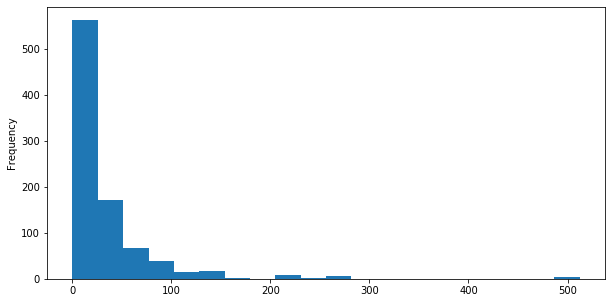

In [15]:
titanic_data['Fare'].plot.hist(bins=20,figsize=(10,5))

In [16]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


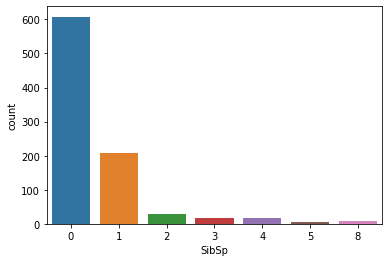

In [18]:
sns.countplot(x="SibSp",data=titanic_data)

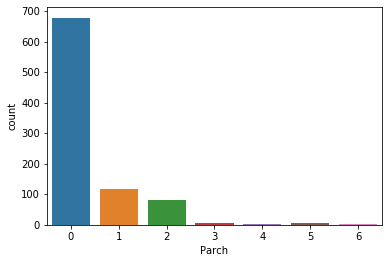

In [19]:
sns.countplot(x='Parch',data=titanic_data)

# data wrangling

# removing unnessary values

In [20]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
titanic_data.isnull().sum() # sum of null values in every column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

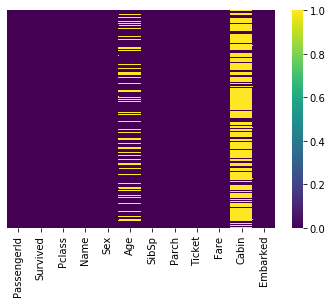

In [24]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cmap='viridis')

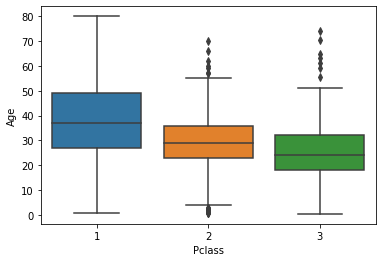

In [25]:
sns.boxplot(x='Pclass',y='Age',data=titanic_data)

In [26]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [28]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [29]:
titanic_data.dropna(inplace=True)

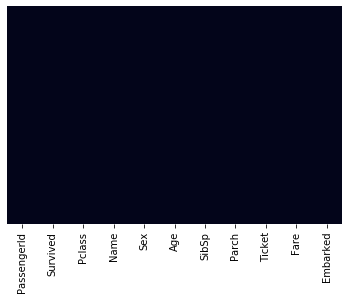

In [30]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False)

# all the null values are removed

In [31]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [32]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


# lot of string values there in order to perform logistic regression convert into binar

In [33]:
pd.get_dummies(titanic_data['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [34]:
pd.get_dummies(titanic_data['Sex'],drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
885,0
886,1
887,0
889,1


In [38]:
sex=pd.get_dummies(titanic_data['Sex'],drop_first=True)

In [40]:
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [41]:
embark=pd.get_dummies(titanic_data['Embarked'])

In [47]:
embark.head(5)

NameError: name 'embark' is not defined

In [44]:
embark=pd.get_dummies(titanic_data['Embarked'],drop_first=True)

In [45]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
885,1,0
886,0,1
887,0,1
889,0,0


In [47]:
Pcl=pd.get_dummies(titanic_data['Pclass'])
Pcl=pd.get_dummies(titanic_data['Pclass'],drop_first=True)

In [48]:
Pcl

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
885,0,1
886,1,0
887,0,0
889,0,0


# all the data categerozied

In [49]:
titanic_data=pd.concat([titanic_data,sex,embark,Pcl],axis=1)

In [50]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


# drop unnessary columns

In [51]:
titanic_data.drop(['Sex','Embarked','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [52]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [53]:
titanic_data.drop('Pclass',axis=1,inplace=True)

In [54]:
titanic_data

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,0,1,0,0,1
886,0,27.0,0,0,13.0000,1,0,1,1,0
887,1,19.0,0,0,30.0000,0,0,1,0,0
889,1,26.0,0,0,30.0000,1,0,0,0,0


# train data now

In [55]:
x=titanic_data.drop('Survived',axis=1) #independent variables
y=titanic_data['Survived']      #the value to perdict

# split the data into training and testing datasets

In [26]:
from sklearn.cross_validation import train_test_split

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [1]:
from sklearn.linear_model import LogisticRegression